In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('loan_train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Exploratory Data Analysis

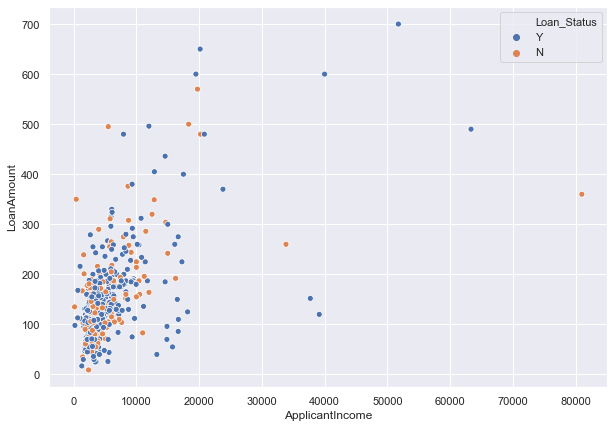

In [6]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

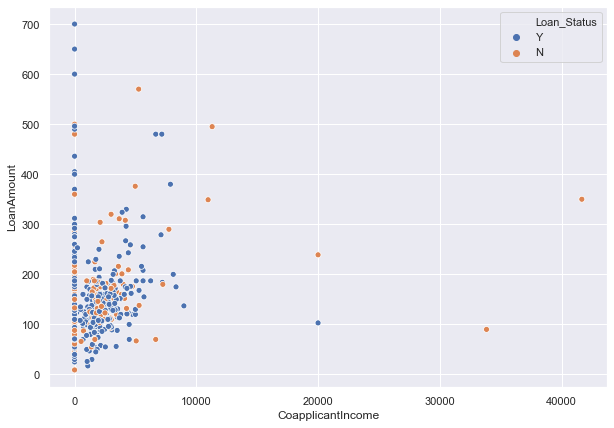

In [7]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

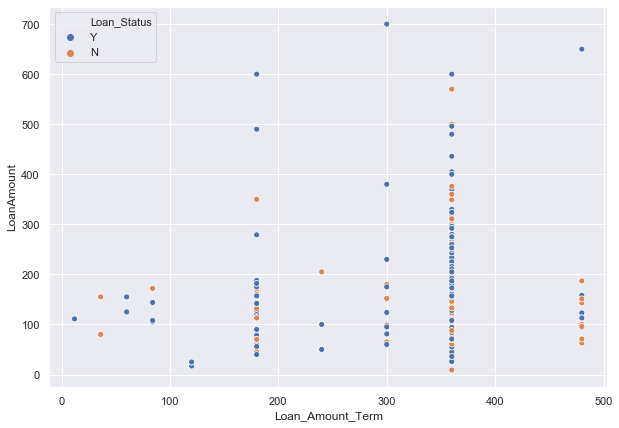

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=df)

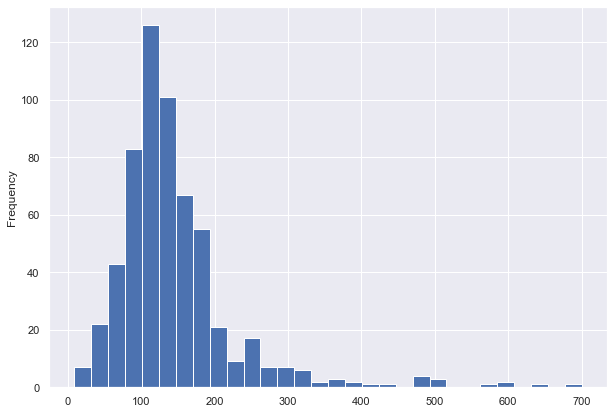

In [9]:
plt.figure(figsize=(10,7))
df['LoanAmount'].plot(kind='hist',bins=30)

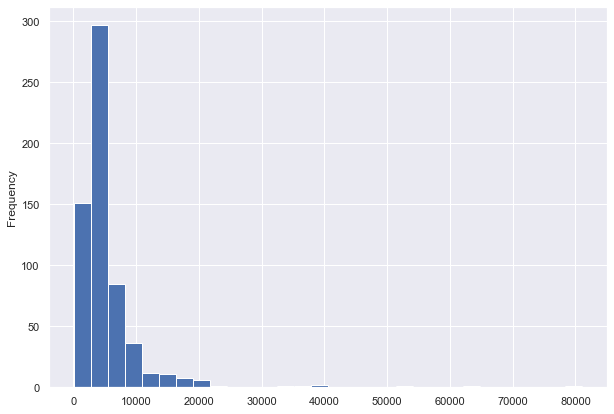

In [10]:
plt.figure(figsize=(10,7))
df['ApplicantIncome'].plot(kind='hist',bins=30)

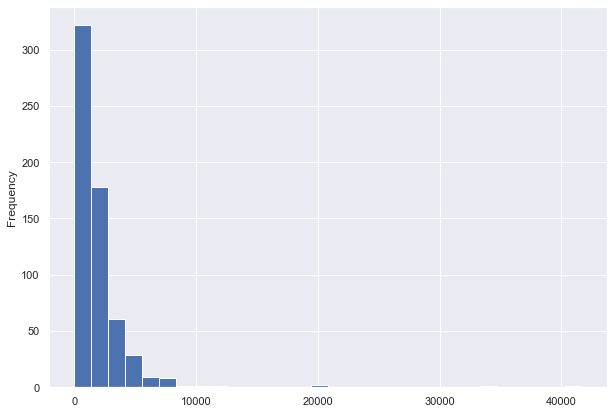

In [11]:
plt.figure(figsize=(10,7))
df['CoapplicantIncome'].plot(kind='hist',bins=30)

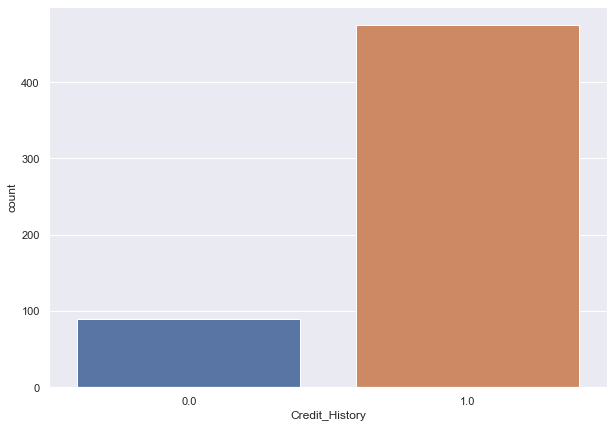

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='Credit_History',data=df)

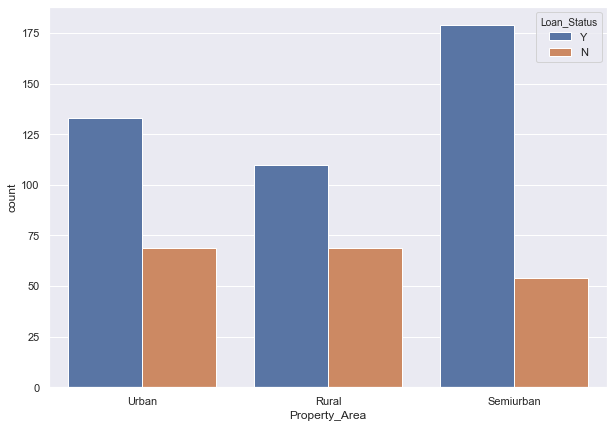

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

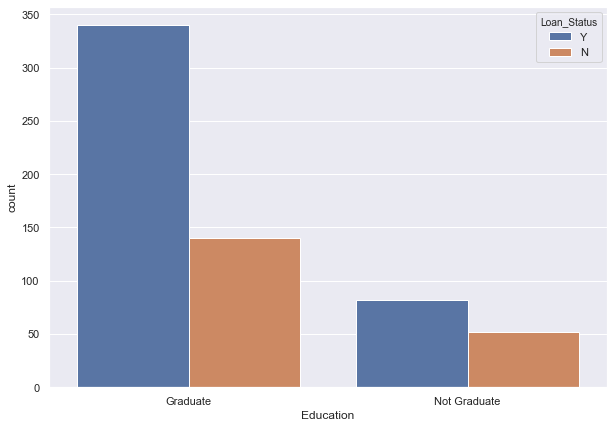

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='Education',hue='Loan_Status',data=df)

Observations from EDA:
From the initial graphs, we observe that we need to cut down on the outliers, by cutting down on the range on the following attributes,

LoanAmount : 0 - 500

ApplicantIncome: 0 - 21000

CoapplicantIncome: 0 - 9000

Loan_Term : 100-470

The count plots show that high number of graduates have their loan approved.

Similarily, a large number of loans approved were approved for Semi Urban areas, followed by Urban and Rural areas

In [15]:
df = df[(df['LoanAmount']<500) & (df['ApplicantIncome']<25000) & (df['CoapplicantIncome']<25000) & (df['Loan_Amount_Term']<500)]

Data Pre-Processing

1. Filling for missing Data Values

In [16]:
df.isna().sum()

Loan_ID               0
Gender               12
Married               2
Dependents           12
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

Filling the mode values for the Missing Data

In [17]:
df['Gender'] = df['Gender'].fillna('Male')

In [18]:
df['Married'] = df['Married'].fillna('Yes')

In [19]:
df['Dependents'] = df['Dependents'].fillna(0)

In [20]:
df['Self_Employed'] = df['Self_Employed'].fillna('Yes')

In [21]:
df['Credit_History'] = df['Credit_History'].fillna(1)

In [22]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              565 non-null object
Gender               565 non-null object
Married              565 non-null object
Dependents           565 non-null object
Education            565 non-null object
Self_Employed        565 non-null object
ApplicantIncome      565 non-null int64
CoapplicantIncome    565 non-null float64
LoanAmount           565 non-null float64
Loan_Amount_Term     565 non-null float64
Credit_History       565 non-null float64
Property_Area        565 non-null object
Loan_Status          565 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 61.8+ KB


In [24]:
df = df.drop(columns= ['Loan_ID']) #drop the column as it is merely a pointet and does not tell you more about the data

As we can see, there are a number of categorical values in the given dataset, we convert them into numeric values

2. Converting Categorical Data

In [25]:
dummy_all = pd.get_dummies(data=df[['Gender','Married','Self_Employed','Property_Area','Dependents','Loan_Status']],drop_first=True)

In [26]:
df = df.drop(columns=['Gender','Married','Self_Employed','Property_Area','Dependents','Loan_Status'])

In [27]:
df = pd.concat([df,dummy_all],axis=1)

In [28]:
ed_grad = pd.get_dummies(data=df['Education'])

In [29]:
ed_grad = ed_grad.drop(columns =['Not Graduate'])

In [30]:
df = pd.concat([df,ed_grad],axis=1)

In [31]:
df = df.drop(columns=['Education'])

In [32]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Status_Y,Graduate
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,1,0,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,1,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1,1


3. Creating heatmap to find correlation

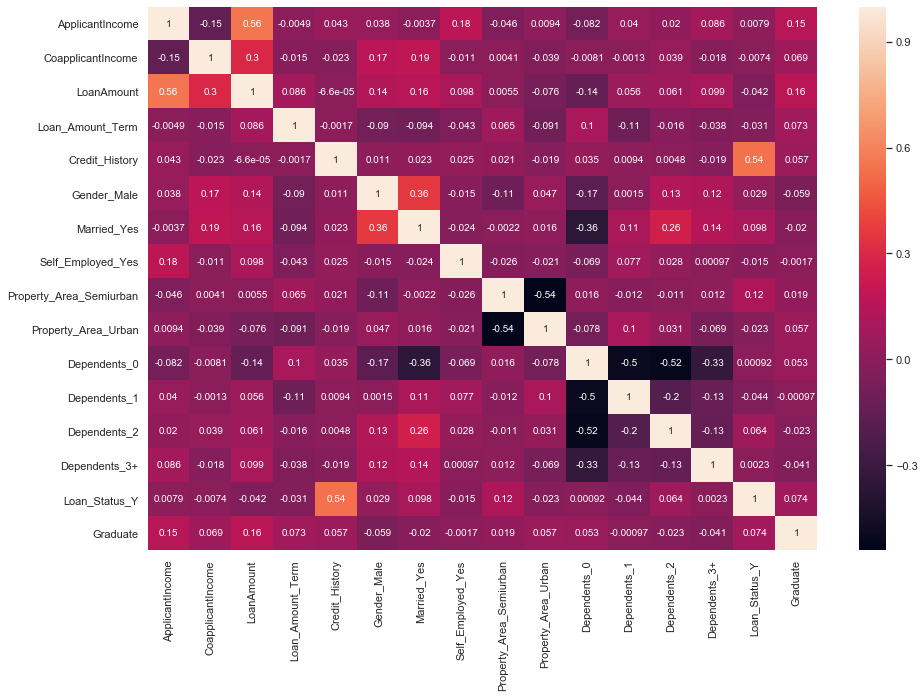

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observation : Highest Correlation is observed between Loan Status with Credit History

Building a Predictive Model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Graduate',
       'Gender_Male', 'Married_Yes', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+']]
y = df['Loan_Status_Y']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(lm.intercept_)

-0.0007672054716187926


In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ApplicantIncome,0.000009
CoapplicantIncome,0.000014
LoanAmount,-0.000453
Loan_Amount_Term,0.000076
Credit_History,0.733024
Graduate,0.041890
Gender_Male,-0.003452
Married_Yes,0.063195
Self_Employed_Yes,-0.012739
Property_Area_Semiurban,0.112347


In [42]:
predictions = lm.predict(X_test)

In [43]:
y_test= y_test.to_numpy()
y_test = pd.Series(y_test)

In [44]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_rtc = pd.Series(predictions)
pred_rtc = pred_rtc.astype(int)
pred_df = pd.concat([pred_df,pred_rtc],axis=1)
pred_df.columns=['Test True Y','Model Predictions']
pred_df['Model Predictions'].astype(int)
pred_df.head()

,Test True Y,Model Predictions
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0


In [45]:
result = []

In [46]:
for i in range(len(pred_rtc)):
    if(pred_rtc[i]==y_test[i]):
        result.append('Correct')
    else:
        result.append('Wrong')

In [47]:
result = pd.Series(result)

In [48]:
pred_df = pd.concat([pred_df,result],axis=1)

In [49]:
pred_df =pred_df.rename(columns={0:'Result'})

In [50]:
pred_df['Result'].value_counts()

Wrong      117
Correct     53
Name: Result, dtype: int64

In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.29035371471736726
MSE: 0.15613485998350002
RMSE: 0.3951390387996357


K-Nearest Neighbours

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
df_drop = df.drop(columns=['Loan_Status_Y'],axis=1)


In [55]:
df_drop.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1


In [56]:
scaled_features= scaler.fit_transform(df_drop)

In [57]:
df_feat = pd.DataFrame(data=scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.068341,-0.009011,-0.183643,0.268972,0.397224,0.47497,0.731660,-0.469364,-0.798549,-0.678195,-1.134658,2.252836,-0.458094,-0.290608,0.522037
1,-0.556006,-0.729275,-1.066453,0.268972,0.397224,0.47497,0.731660,2.130544,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,0.522037
2,-0.684469,0.396974,-0.297554,0.268972,0.397224,0.47497,0.731660,-0.469364,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,-1.915573
3,0.368186,-0.729275,0.001462,0.268972,0.397224,0.47497,-1.366755,-0.469364,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,0.522037
4,0.188585,1.274856,1.795558,0.268972,0.397224,0.47497,0.731660,2.130544,-0.798549,1.474502,-1.134658,-0.443885,2.182958,-0.290608,0.522037


In [58]:
df_feat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.068341,-0.009011,-0.183643,0.268972,0.397224,0.474970,0.731660,-0.469364,-0.798549,-0.678195,-1.134658,2.252836,-0.458094,-0.290608,0.522037
1,-0.556006,-0.729275,-1.066453,0.268972,0.397224,0.474970,0.731660,2.130544,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,0.522037
2,-0.684469,0.396974,-0.297554,0.268972,0.397224,0.474970,0.731660,-0.469364,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,-1.915573
3,0.368186,-0.729275,0.001462,0.268972,0.397224,0.474970,-1.366755,-0.469364,-0.798549,1.474502,0.881323,-0.443885,-0.458094,-0.290608,0.522037
4,0.188585,1.274856,1.795558,0.268972,0.397224,0.474970,0.731660,2.130544,-0.798549,1.474502,-1.134658,-0.443885,2.182958,-0.290608,0.522037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,-0.586813,-0.729275,-0.995259,0.268972,0.397224,-2.105396,-1.366755,-0.469364,-0.798549,-0.678195,0.881323,-0.443885,-0.458094,-0.290608,0.522037
561,-0.215287,-0.729275,-1.436663,-2.510956,0.397224,0.474970,0.731660,-0.469364,-0.798549,-0.678195,-1.134658,-0.443885,-0.458094,3.441062,0.522037
562,1.006495,-0.614644,1.596214,0.268972,0.397224,0.474970,0.731660,-0.469364,-0.798549,1.474502,-1.134658,2.252836,-0.458094,-0.290608,0.522037
563,0.855852,-0.729275,0.656449,0.268972,0.397224,0.474970,0.731660,-0.469364,-0.798549,1.474502,-1.134658,-0.443885,2.182958,-0.290608,0.522037


In [59]:
X=df_feat
y=df['Loan_Status_Y']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

Choosing a K Value

In [61]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

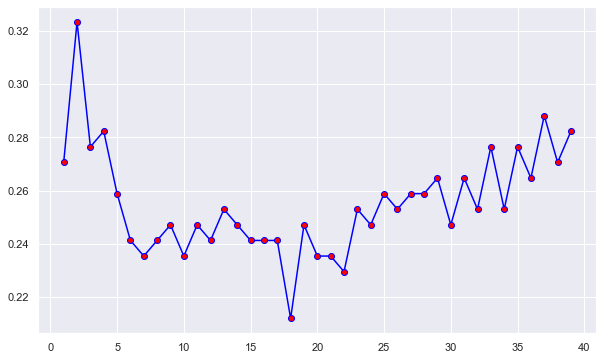

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',mfc='red',marker='o')

We choose K value as 11 i.e K=18

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        54
           1       0.76      1.00      0.87       116

    accuracy                           0.79       170
   macro avg       0.88      0.67      0.68       170
weighted avg       0.84      0.79      0.75       170



Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
pred = lm.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.78      0.98      0.87       116

    accuracy                           0.79       170
   macro avg       0.84      0.69      0.71       170
weighted avg       0.82      0.79      0.76       170



Support Vector Machines

In [68]:
from sklearn.svm import SVC

In [69]:
model = SVC()

In [70]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
predictions = model.predict(X_test)

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.78      0.98      0.87       116

    accuracy                           0.79       170
   macro avg       0.84      0.69      0.71       170
weighted avg       0.82      0.79      0.76       170



Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rtc = RandomForestClassifier(n_estimators=600)

In [75]:
rtc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
pred_rtc= rtc.predict(X_test) 

In [77]:
print(classification_report(y_test,pred_rtc))
print(confusion_matrix(y_test,pred_rtc))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        54
           1       0.77      0.94      0.84       116

    accuracy                           0.76       170
   macro avg       0.76      0.66      0.68       170
weighted avg       0.76      0.76      0.74       170

[[ 21  33]
 [  7 109]]


Observation: The highest accuracy was shown by Logistic Regression and Support Vector Machines at around 79% followed by Random forest and KNN at around 76%. The lowest of all was provided by Linear Regression.

Neural Network ANNs

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
X_train = X_train.values
y_train = y_train.values

In [80]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 4,activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [81]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [82]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 395 samples, validate on 170 samples
Epoch 1/1000
395/395 [==============================] - 1s 3ms/sample - loss: 0.7888 - val_loss: 0.7385
Epoch 2/1000
395/395 [==============================] - 0s 144us/sample - loss: 0.7473 - val_loss: 0.7142
Epoch 3/1000
395/395 [==============================] - 0s 143us/sample - loss: 0.7322 - val_loss: 0.6939
Epoch 4/1000
395/395 [==============================] - 0s 137us/sample - loss: 0.7076 - val_loss: 0.6791
Epoch 5/1000
395/395 [==============================] - 0s 143us/sample - loss: 0.6949 - val_loss: 0.6690
Epoch 6/1000
395/395 [==============================] - 0s 149us/sample - loss: 0.6855 - val_loss: 0.6600
Epoch 7/1000
395/395 [==============================] - 0s 154us/sample - loss: 0.6541 - val_loss: 0.6525
Epoch 8/1000
395/395 [==============================] - 0s 144us/sample - loss: 0.6502 - val_loss: 0.6458
Epoch 9/1000
395/395 [==============================] - 0s 165us/sample - loss: 0.6711 - val_loss: 0.6399
Ep

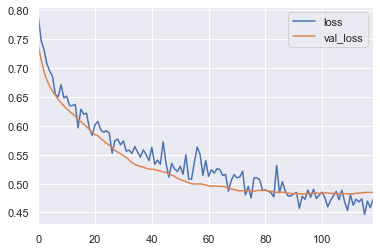

In [83]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [84]:
predictions = model.predict_classes(X_test)

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.78      0.98      0.87       116

    accuracy                           0.79       170
   macro avg       0.84      0.69      0.71       170
weighted avg       0.82      0.79      0.76       170



An ANN has been created which gives us an accuracy of nearly 78-79%